<a href="https://colab.research.google.com/github/shoabahamed/khanacademy-statistics-and-probability/blob/main/plotting_normal_distribution_graph.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h2>PRACTICE</h2>
<H3>Create the same plot in excel but with more functions such as making probability guesses such as what is probability of a value being in between a and b</H3>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, kde
import seaborn as sns

In [2]:
datas = np.arange(-20, 21, 1)
datas

array([-20, -19, -18, -17, -16, -15, -14, -13, -12, -11, -10,  -9,  -8,
        -7,  -6,  -5,  -4,  -3,  -2,  -1,   0,   1,   2,   3,   4,   5,
         6,   7,   8,   9,  10,  11,  12,  13,  14,  15,  16,  17,  18,
        19,  20])

In [58]:
def get_variance(datas):
    datas = np.array(datas)
    mean = np.mean(datas)
    deviation_sum = np.sum(np.square(datas-mean))
    return deviation_sum/len(datas)
    
def get_zscore(datas, miu, std):
    return (datas - miu)/std

In [40]:
def get_normal_values(datas, mean=5, variance=25):
    datas = np.array(datas)
    std = np.sqrt(variance)
    zscore = get_zscore(datas, mean, std)

    denominator = np.sqrt(2*np.pi*variance)
    nominator = np.exp(-((zscore*zscore)/2))

    return nominator / denominator


In [5]:
variance = get_variance(datas)
mean = np.mean(datas)
print(f"The mean of the datas is {mean}")
print(f"The variance of the datas is {variance}")

The mean of the datas is 0.0
The variance of the datas is 140.0


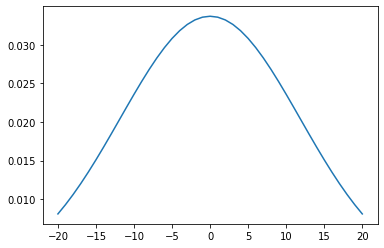

In [22]:
normal_vals = get_normal_values(datas, mean=0, variance=140)
plt.plot(datas, normal_vals)
plt.show()

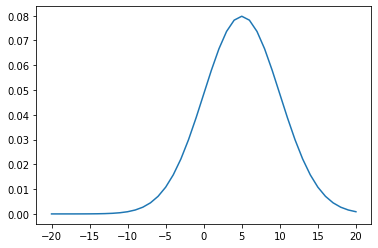

In [7]:
normal_vals = get_normal_values(datas, miu=5, variance=25)
plt.plot(datas, normal_vals)
plt.show()

<P>Now lets try to plot the probability density function through scypi</P>

In [24]:
std = np.sqrt(variance)

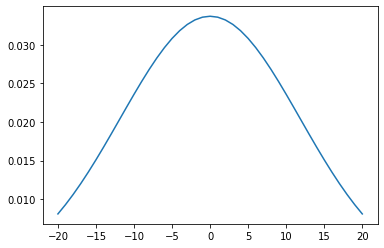

In [86]:
pdf_values = norm.pdf(datas, mean, std)
plt.plot(datas, pdf_values)
plt.show()

<p>We can see that although the graphs are still probability density graphs they looks kinda funky and weird. Lets how seaborn kdeplot shows us</p>

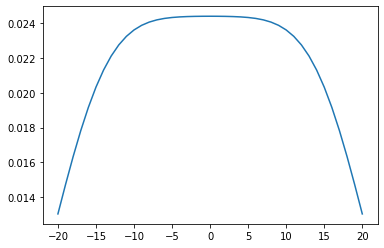

In [17]:
ked = kde.gaussian_kde(datas)
plt.plot(datas, ked(datas))
plt.show()

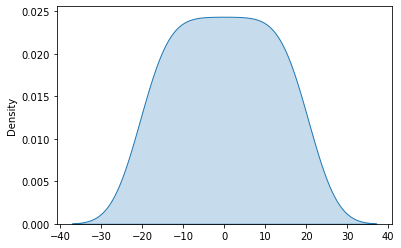

In [10]:
sns.kdeplot(datas, shade=True)

(array([0.02439024, 0.02439024, 0.02439024, 0.02439024, 0.02439024,
        0.02439024, 0.02439024, 0.02439024, 0.02439024, 0.0304878 ]),
 array([-20., -16., -12.,  -8.,  -4.,   0.,   4.,   8.,  12.,  16.,  20.]),
 <a list of 10 Patch objects>)

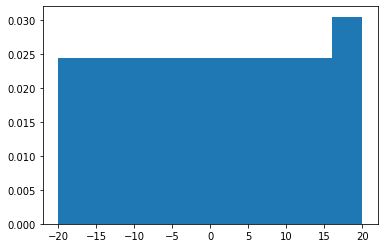

In [30]:
plt.hist(datas, density=True, stacked=True)

<P>We can see that seaborns kdeplot or kernle density plot and scipy's kde.guassian_kde() is same. They both plot the gaussian curve</p>

Now lets see how they look for other values.

In [27]:
cars = sns.load_dataset('mpg').dropna()
cars.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [46]:
horsepower = cars.horsepower.values

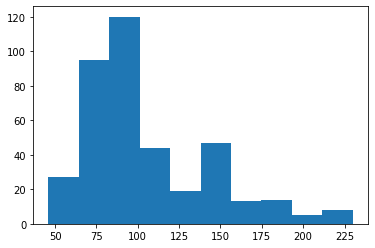

In [61]:
plt.hist(horsepower)
plt.show()

In [88]:
range = np.linspace(min(horsepower), max(horsepower), 392)
hp_mean = np.mean(horsepower)
hp_variance = np.var(horsepower)
hp_std = np.sqrt(variance)
norm_values = get_normal_values(horsepower, mean=hp_mean, variance=hp_variance)

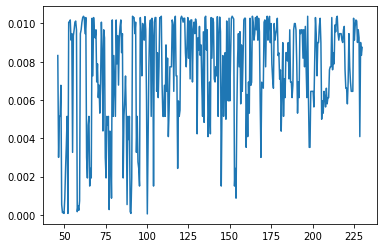

In [89]:
plt.plot(range, norm_values)

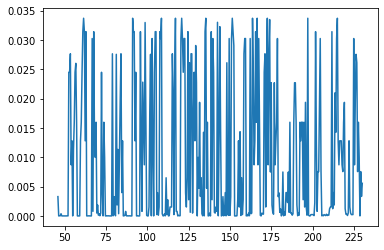

In [87]:
plt.plot(range, norm.pdf(horsepower, hp_mean, hp_std))

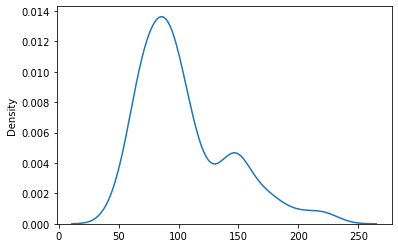

In [77]:
sns.kdeplot(horsepower)

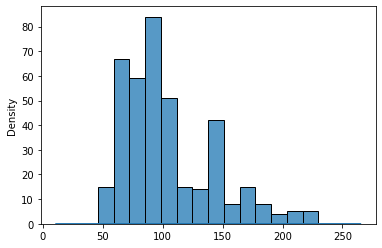

In [76]:
sns.kdeplot(horsepower)
sns.histplot(horsepower)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


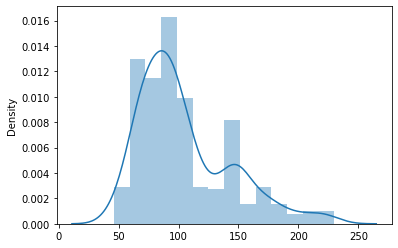

In [93]:
sns.distplot(horsepower)
plt.show()

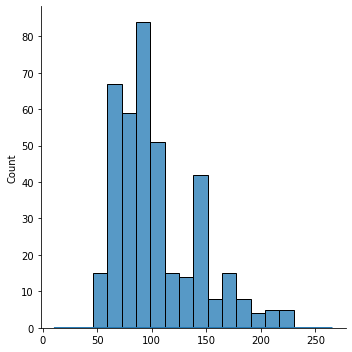

In [96]:
sns.displot(horsepower)
sns.kdeplot(horsepower)
plt.show()

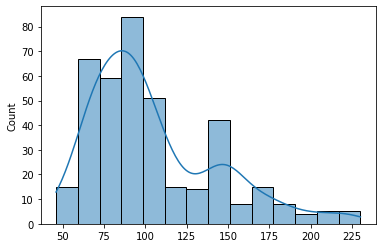

In [99]:
sns.histplot(horsepower, kde=True)

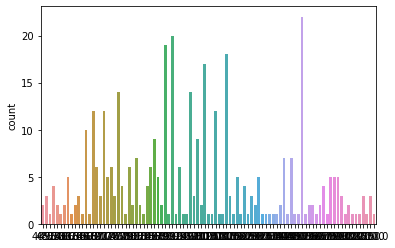

In [98]:
sns.countplot(x=horsepower)